# DSCI100 Project Planning Stage (Individual)
**Section: 004**

**Group: 15** 

**Name: Mia Pu** 

**Student Number: 52408770**

## Importing Libraries and Formatting Graphs

In [1]:
# Importing Libraries
library(tidyverse)
library(repr)
library(tidymodels)

# Formatting Graphs
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Importing Dataset

In [2]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## (1) Data Description

### Introduction
The datasets were collected by a UBC research group that recorded player actions on a Minecraft server to study gameplay behaviors. The players.csv file contains player information; the sessions.csv file contains session data that tracks when each player started and ended a game.

### players.csv
- Number of Observations: 196
- Number of Variables: 7
  | Variable | Type | Meaning |
  | --- | --- | --- |
  | hashedEmail | chr | An unique and anonymous identifier for each player. Used to link to sessions.csv. |
  | name | chr | Player’s username. |
  | gender | chr | Player’s gender. |
  | Age | dbl | Player’s age. |
  | experience | chr | Player’s self-reported gaming experience (Pro, Veteran, Regular, Amateur). |
  | played_hours | dbl | Total gameplay hours accumulated. |
  | subscribe| lgl (TRUE/FALSE) | Whether the player subscribed to a game-related newsletter. |
- Summary Statistics
  | Variable | Mean | Median | SD | Min | Max |
  | --- | --- | --- | --- | --- | --- |
  | played_hours | 5.85 | 0.10 | 28.20 | 0.00 | 223.10 |
  | Age | 21.14 | 19.00 | 6.78 | 9 | 58 |

### sessions.csv
- Number of Observations: 1535
- Number of Variables: 5
  | Variable | Type | Meaning |
  | --- | --- | --- |
  | hashedEmail | chr | An unique and anonymous identifier for each player. Used to link to players.csv. |
  | start_time | chr (date-time) | Session start time in DD/MM/YYYY HH:MM format. |
  | end_time | chr (date-time) | Session end time in DD/MM/YYYY HH:MM format. |
  | original_start_time | dbl | Machine-recorded timestamps for session start. |
  | original_end_time | dbl | Machine-recorded timestamps for session end. |
- Summary Statistics
  | Variable | Mean | Median | SD | Min | Max |
  | --- | --- | --- | --- | --- | --- |
  | session_duration (in minutes) | 50.86 | 30.00 | 55.57 | 3 | 259 |

### Issues/Potential Issues
- played_hours and Age contain outliers, which may influence modeling.
- Self-reported values (experience) may contain bias.
- Session duration needs to be derived by calculating the difference between start and end times.

## (2) Questions

### Broad Question
- The broad question that I will address is Q1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
### Specific Question
- The specific question will be “Can playing hours and experience level predict whether a player subscribes to a game-related newsletter in players dataset, and how do playing hours differ between players with different experience levels?”
### Connection to Data
- Since players.csv includes both the explanatory and response variables, it can be used directly. I will wraggle the data by converting the experience into a categorical factor. Then, I can use the data in a classification model to predict subscriptions. For the second half of the question, I will compare playing hours across different experience levels using plots.

## (3) Exploratory Data Analysis and Visualization

### Demonstration of Data Loading

In [3]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Minimal Data Wrangling
The experience variable was converted into a categorical factor to ensure the dataset was tidy and ready for analysis.

In [4]:
players_tidy <- players |>
  mutate(experience = as.factor(experience))

players_tidy

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### Mean Values for Quantitative Variables in players

In [5]:
players |> 
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE))

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


### Exploratory Visualizations

*I use a logarithmic scale for played_hours since there are some outliers. This makes the pattern easier to see and prevents the plot from being dominated by outliers.

**Plot 1 - Subscription vs Playing Hours**

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


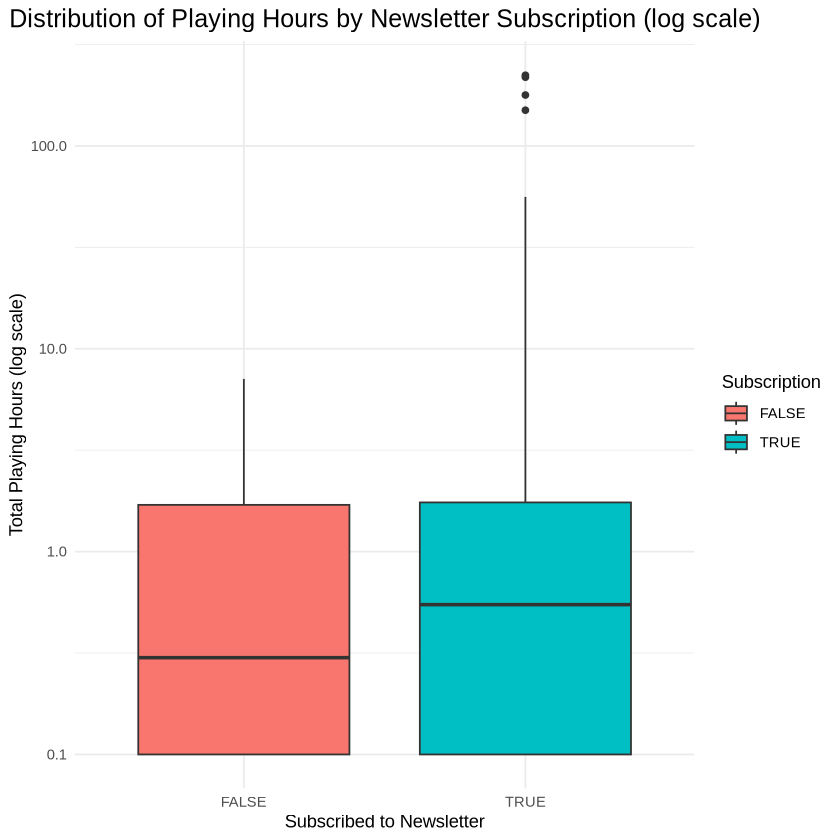

In [9]:
ggplot(players_tidy, aes(x = subscribe, y = played_hours, fill = subscribe)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(title = "Distribution of Playing Hours by Newsletter Subscription (log scale)",
        x = "Subscribed to Newsletter",
        y = "Total Playing Hours (log scale)",
        fill = "Subscription") +
    theme_minimal() +
    theme(plot.title = element_text(size = 15, hjust = 0.5))

**Insights from plot 1** 

The boxplot shows that players who subscribed to the newsletter have slightly higher playing hours. However, since the distributions are similar, playing hours itself is not a strong predictor for subscription behavior.

**Plot 2 - Subscription vs Experience**

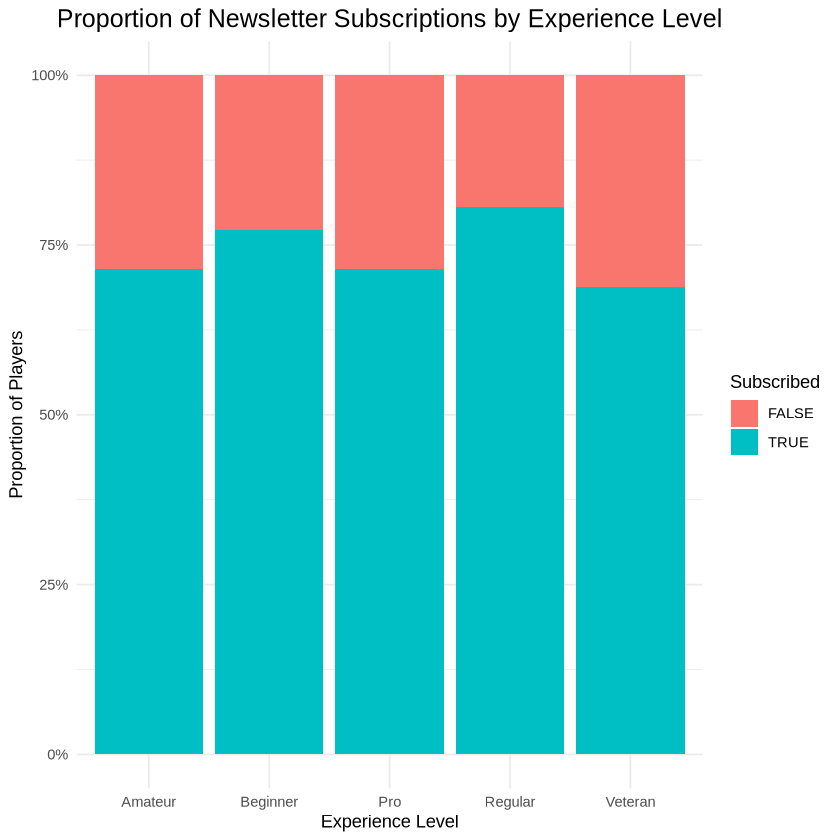

In [12]:
ggplot(players_tidy, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(title = "Proportion of Newsletter Subscriptions by Experience Level",
        x = "Experience Level",
        y = "Proportion of Players",
        fill = "Subscribed") +
    scale_y_continuous(labels = scales::percent_format()) +
    theme_minimal() +
    theme(plot.title = element_text(size = 15, hjust = 0.5))

**Insights from plot 2** 

The stacked bar chart shows that the players with experience level of regular and beginner have slightly higher subscription rate when compared to others. However, the difference between players with different experience levels is small, indicating experience level is not a strong predictor for subscription.

**Plot 3 - Experience Level vs Playing Hours**

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


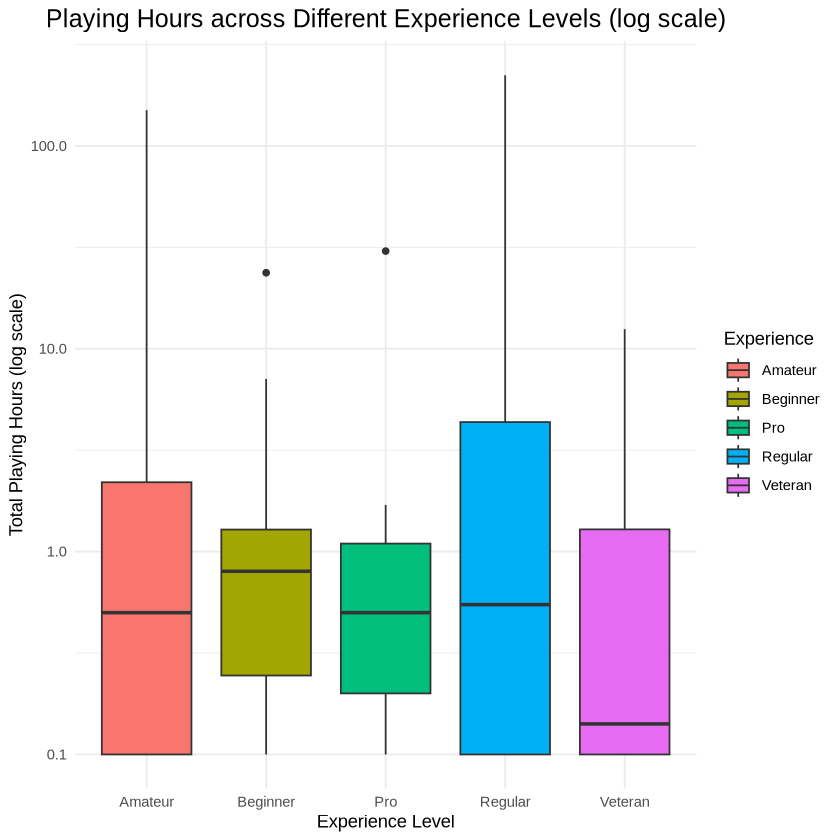

In [13]:
ggplot(players_tidy, aes(x = experience, y = played_hours, fill = experience)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(title = "Playing Hours across Different Experience Levels (log scale)",
        x = "Experience Level",
        y = "Total Playing Hours (log scale)",
        fill = "Experience") +
    theme_minimal() +
        theme(plot.title = element_text(size = 15, hjust = 0.5))

**Insights from plot 3**

Regular players have the highest median and widest range of playing hours, suggesting more active engagement. However, both amateur and veteran players show lower median playing hours, indicating lower engagement. This indicates that playing time does not increase with self-reported experience level as experience level increases in the order Amateur → Beginner → Regular → Pro → Veteran.